In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df = pd.read_excel("C:\\Users\\ahmed\\Documents\\data\\Online_retail_customer_transactioncleaned_data.xlsx")

In [5]:
df

,Unnamed: 0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Month,Days,Year,DayOfWeek,Hour,Minute,TimeOfDay,TotalPrice
0,0,0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,2010-01-12,08:26:00,1,12,2010,1,8,26,Morning,15.30
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,08:26:00,1,12,2010,1,8,26,Morning,20.34
2,2,2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,2010-01-12,08:26:00,1,12,2010,1,8,26,Morning,22.00
3,3,3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,08:26:00,1,12,2010,1,8,26,Morning,20.34
4,4,4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,08:26:00,1,12,2010,1,8,26,Morning,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,9950,9996,537224,22623,BOX OF VINTAGE JIGSAW BLOCKS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,2010-05-12,16:24:00,5,12,2010,2,16,24,Afternoon,9.90
9851,9951,9997,537224,21363,HOME SMALL WOOD LETTERS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,2010-05-12,16:24:00,5,12,2010,2,16,24,Afternoon,9.90
9852,9952,9998,537224,21556,CERAMIC STRAWBERRY MONEY BOX,2,2010-05-12 16:24:00,2.55,13174,United Kingdom,2010-05-12,16:24:00,5,12,2010,2,16,24,Afternoon,5.10
9853,9953,9999,537224,22497,SET OF 2 TINS VINTAGE BATHROOM,2,2010-05-12 16:24:00,4.25,13174,United Kingdom,2010-05-12,16:24:00,5,12,2010,2,16,24,Afternoon,8.50


In [6]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [7]:
latest_purchase_date = df['InvoiceDate'].max()
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase.columns = ['CustomerID', 'last_purchase_date']

# Calculate recency (difference in days)
last_purchase['recency'] = (latest_purchase_date - last_purchase['last_purchase_date']).dt.days

# Merge back if you want to add it to the original df
df = df.merge(last_purchase[['CustomerID', 'recency']], on='CustomerID', how='left')

In [8]:
df

,Unnamed: 0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,...,Time,Month,Days,Year,DayOfWeek,Hour,Minute,TimeOfDay,TotalPrice,recency
0,0,0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,...,08:26:00,1,12,2010,1,8,26,Morning,15.30,89
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,08:26:00,1,12,2010,1,8,26,Morning,20.34,89
2,2,2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,...,08:26:00,1,12,2010,1,8,26,Morning,22.00,89
3,3,3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,08:26:00,1,12,2010,1,8,26,Morning,20.34,89
4,4,4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,08:26:00,1,12,2010,1,8,26,Morning,20.34,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,9950,9996,537224,22623,BOX OF VINTAGE JIGSAW BLOCKS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,...,16:24:00,5,12,2010,2,16,24,Afternoon,9.90,0
9851,9951,9997,537224,21363,HOME SMALL WOOD LETTERS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,...,16:24:00,5,12,2010,2,16,24,Afternoon,9.90,0
9852,9952,9998,537224,21556,CERAMIC STRAWBERRY MONEY BOX,2,2010-05-12 16:24:00,2.55,13174,United Kingdom,...,16:24:00,5,12,2010,2,16,24,Afternoon,5.10,0
9853,9953,9999,537224,22497,SET OF 2 TINS VINTAGE BATHROOM,2,2010-05-12 16:24:00,4.25,13174,United Kingdom,...,16:24:00,5,12,2010,2,16,24,Afternoon,8.50,0


In [13]:
df['frequency'] = df.groupby('CustomerID')['InvoiceDate'].transform('count')

In [15]:
df

,Unnamed: 0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,...,Month,Days,Year,DayOfWeek,Hour,Minute,TimeOfDay,TotalPrice,recency,frequency
0,0,0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,...,1,12,2010,1,8,26,Morning,15.30,89,297
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,1,12,2010,1,8,26,Morning,20.34,89,297
2,2,2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,...,1,12,2010,1,8,26,Morning,22.00,89,297
3,3,3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,1,12,2010,1,8,26,Morning,20.34,89,297
4,4,4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,1,12,2010,1,8,26,Morning,20.34,89,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,9950,9996,537224,22623,BOX OF VINTAGE JIGSAW BLOCKS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,...,5,12,2010,2,16,24,Afternoon,9.90,0,90
9851,9951,9997,537224,21363,HOME SMALL WOOD LETTERS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,...,5,12,2010,2,16,24,Afternoon,9.90,0,90
9852,9952,9998,537224,21556,CERAMIC STRAWBERRY MONEY BOX,2,2010-05-12 16:24:00,2.55,13174,United Kingdom,...,5,12,2010,2,16,24,Afternoon,5.10,0,90
9853,9953,9999,537224,22497,SET OF 2 TINS VINTAGE BATHROOM,2,2010-05-12 16:24:00,4.25,13174,United Kingdom,...,5,12,2010,2,16,24,Afternoon,8.50,0,90


In [16]:
df['monetary'] = df.groupby('CustomerID')['TotalPrice'].transform('sum')

In [17]:
df

,Unnamed: 0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,...,Days,Year,DayOfWeek,Hour,Minute,TimeOfDay,TotalPrice,recency,frequency,monetary
0,0,0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,...,12,2010,1,8,26,Morning,15.30,89,297,5391.21
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,12,2010,1,8,26,Morning,20.34,89,297,5391.21
2,2,2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,...,12,2010,1,8,26,Morning,22.00,89,297,5391.21
3,3,3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,12,2010,1,8,26,Morning,20.34,89,297,5391.21
4,4,4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,12,2010,1,8,26,Morning,20.34,89,297,5391.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,9950,9996,537224,22623,BOX OF VINTAGE JIGSAW BLOCKS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,...,12,2010,2,16,24,Afternoon,9.90,0,90,742.85
9851,9951,9997,537224,21363,HOME SMALL WOOD LETTERS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,...,12,2010,2,16,24,Afternoon,9.90,0,90,742.85
9852,9952,9998,537224,21556,CERAMIC STRAWBERRY MONEY BOX,2,2010-05-12 16:24:00,2.55,13174,United Kingdom,...,12,2010,2,16,24,Afternoon,5.10,0,90,742.85
9853,9953,9999,537224,22497,SET OF 2 TINS VINTAGE BATHROOM,2,2010-05-12 16:24:00,4.25,13174,United Kingdom,...,12,2010,2,16,24,Afternoon,8.50,0,90,742.85


In [33]:
df.dtypes

Unnamed: 0              int64
index                   int64
InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Date           datetime64[ns]
Time                   object
Month                   int64
Days                    int64
Year                    int64
DayOfWeek               int64
Hour                    int64
Minute                  int64
TimeOfDay              object
TotalPrice            float64
recency                 int64
frequency               int64
monetary              float64
dtype: object

In [43]:
features = ['recency','frequency','monetary']
X = df[features]


In [44]:
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

<function matplotlib.pyplot.show(close=None, block=None)>

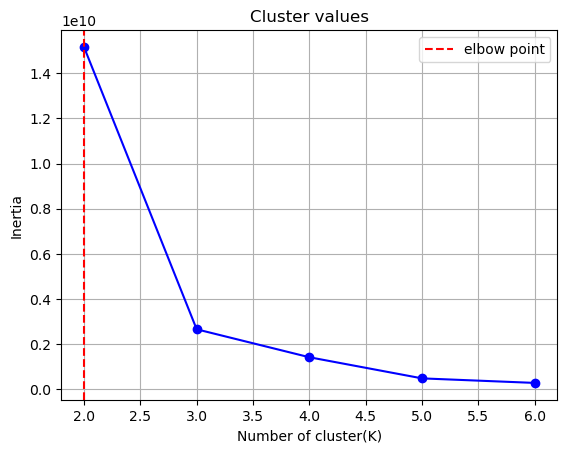

In [51]:
# check optimal cluster value of k with Elbow method

import matplotlib.pyplot as plt
k_values =range(2,7)
inertia = []

#find inertia of every k values
for k in k_values:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values,inertia,'bo-')
plt.xlabel('Number of cluster(K)')
plt.ylabel('Inertia')
plt.title('Cluster values')

diff = [inertia[i] - inertia[i+1] for i in range(len(inertia) -1)]
best_k = diff.index(max(diff)) + 2
plt.axvline(x = best_k, color = 'r',linestyle = '--',label = 'elbow point')
plt.legend()
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

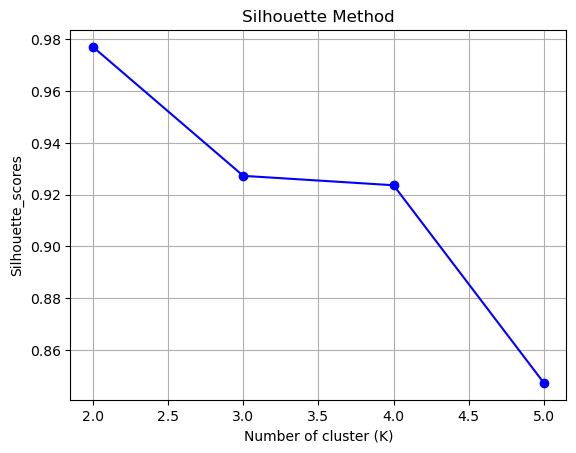

In [62]:
# validate optimal cluster value of k with silhouette score
from sklearn.metrics import silhouette_score
k_values = range(2,7)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X,labels))

# plot silhouette_score
plt.plot(k_values,silhouette_scores,'bo-')
plt.xlabel('Number of cluster (K)')
plt.ylabel('Silhouette_scores')
plt.title('Silhouette Method')


In [64]:
#Apply K-means clustering with k=2
kmeans = KMeans(n_clusters= 2)
kmeans.fit(X)

#Get predicted cluster labels
labels = kmeans.labels_

#Get predicited cluster label as a new column to the orignal dataset
df['labels'] = labels

In [71]:
df

,Unnamed: 0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,...,Year,DayOfWeek,Hour,Minute,TimeOfDay,TotalPrice,recency,frequency,monetary,labels
0,0,0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,...,2010,1,8,26,Morning,15.30,89,297,5391.21,0
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,2010,1,8,26,Morning,20.34,89,297,5391.21,0
2,2,2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,...,2010,1,8,26,Morning,22.00,89,297,5391.21,0
3,3,3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,2010,1,8,26,Morning,20.34,89,297,5391.21,0
4,4,4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,...,2010,1,8,26,Morning,20.34,89,297,5391.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,9950,9996,537224,22623,BOX OF VINTAGE JIGSAW BLOCKS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,...,2010,2,16,24,Afternoon,9.90,0,90,742.85,0
9851,9951,9997,537224,21363,HOME SMALL WOOD LETTERS,2,2010-05-12 16:24:00,4.95,13174,United Kingdom,...,2010,2,16,24,Afternoon,9.90,0,90,742.85,0
9852,9952,9998,537224,21556,CERAMIC STRAWBERRY MONEY BOX,2,2010-05-12 16:24:00,2.55,13174,United Kingdom,...,2010,2,16,24,Afternoon,5.10,0,90,742.85,0
9853,9953,9999,537224,22497,SET OF 2 TINS VINTAGE BATHROOM,2,2010-05-12 16:24:00,4.25,13174,United Kingdom,...,2010,2,16,24,Afternoon,8.50,0,90,742.85,0


In [70]:
df.groupby('labels').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'CustomerID': 'count'
})

,recency,frequency,monetary,CustomerID
labels,,,,
0,59.886056,58.013537,823.895837,7609
1,0.000000,2246.000000,36041.500000,2246


In [78]:
df.to_csv('C:\\Users\\ahmed\\Documents\\data\\Online_retail_customer_transaction_clustered_data.csv',index=False)